In [1]:
import numpy as np

def y_predicted_array(W_0, W_i, X_normalized):
    return np.dot(W_i, X_normalized) + W_0
def min_max_normalize(X_input, Y_input):
    # Normalize X_input column-wise (i.e., normalize each feature across rows)
    X_min = np.min(X_input, axis=1, keepdims=True)
    X_max = np.max(X_input, axis=1, keepdims=True)
    X_normalized = (X_input - X_min) / (X_max - X_min)
    
    # Normalize Y_input using Min-Max normalization
    Y_min = np.min(Y_input)
    Y_max = np.max(Y_input)
    Y_normalized = (Y_input - Y_min) / (Y_max - Y_min)
    
    return X_normalized, Y_normalized

LOADING DATASET

In [2]:
import pandas as pd
import numpy as np

# Load the CSV file
df = pd.read_csv('income.data.csv')

# Extract the 'income' and 'happiness' columns into NumPy arrays
income = df['income'].to_numpy()
happiness = df['happiness'].to_numpy()



In [3]:
# given input data in X_input , we create a matrix named X
# in input_X ,each row belongs to each tuple of input array



# X_input = np.array([[1, 2, 3, 4, 1, 2, 3],
#                     [4, 3, 2, 1, 4, 9, 5],
#                     [4, 5, 2, 1, 3, 1, 8]])

# Y_input =np.array([3,4,5,2,3,4,1])

# in case of only 1D then do this to avoid any change to function mmin max normalisation
X_input = income.reshape(1, -1)  # Reshape to (1, n_samples)
Y_input = happiness  # Reshape to (1, n_samples)


W_i=np.array([0.14])
W_0=0.65

X_normalized,Y_normalized=min_max_normalize(X_input,Y_input)

# print("Number of features")

y_predicted=y_predicted_array(W_0 ,W_i ,X_normalized)
print("number of samples---> ",X_input.shape[1])
print("number of features---> ",X_input.shape[0])
print("parametre size---> ",W_i.shape[0]+1)

print("input size --->",X_normalized.shape)
print("output size",Y_normalized.shape)
print()
print()
print("input shape",X_input)








number of samples--->  498
number of features--->  1
parametre size--->  2
input size ---> (1, 498)
output size (498,)


input shape [[3.86264742 4.97938138 4.92395694 3.21437244 7.19640925 3.72964348
  4.67451739 4.49810382 3.12163053 4.63991444 4.63283951 2.7731789
  7.11947859 7.4666532  2.11774233 2.55916582 2.35479322 2.38815725
  4.75568027 1.99427505 7.31091603 3.52831896 2.42875167 3.54274787
  5.22720124 6.69199314 3.90040994 2.29105548 2.38051271 2.54960878
  6.93329583 1.85564517 3.58902314 6.82647791 2.07060188 5.22420527
  2.24311363 7.07616637 4.1906725  1.95648612 5.06175818 3.98218993
  3.06505862 3.68287749 3.78942929 5.35871566 5.19611978 5.24118957
  7.10161959 3.42402109 2.25339902 5.3703369  6.225606   5.48286223
  4.03417211 6.51021872 6.02921386 6.94911289 7.19503729 2.7573385
  6.95607948 4.67019258 6.36829267 6.16668117 6.07415829 5.48471897
  1.58957474 1.68047393 5.49994796 4.0438909  5.00509324 4.86358173
  1.50627504 2.86466385 5.87790629 6.48398379 4.93803

GRADIENT DESCENT

In [4]:
def mse(y_predicted ,y_actual):
    total=(y_predicted-y_actual)**2
    return np.mean(total)

error= mse(y_predicted,Y_normalized)
print("error",error)

print(len(X_input))

epochs=10000
learning_rate=0.003

diff_w_i = np.zeros(len(X_input))
diff_w_0=np.zeros(1)




def gradient_descent(W_0 ,W_i ,X_normalized ,Y_normalized ,epochs ,learning_rate):
    '''
        Creating a function that returns the updated value of weights
    '''
    # finding derative of w_i's
    losses=[]
    for epoch in range(epochs):
        predicted_y = y_predicted_array(W_0 ,W_i ,X_normalized)
        for i in range(len(X_input)):
            numerator= (-2)*(X_normalized[i])*(Y_normalized-predicted_y)

            diff_w_i[i]= np.mean(numerator)
            # finding deratives of w_0's

        # predicted_y=y_predicted_array(W_0 ,W_i ,X_normalized)
        numerator=(-2)*(Y_normalized-predicted_y)
        diff_w_0[0]=np.mean(numerator)

        # finding updated weight after finding the derivate of weigts
        W_0 =W_0- learning_rate * diff_w_0[0]

        for i in range(len(W_i)):
            W_i[i] = W_i[i] - learning_rate * diff_w_i[i]
        
        y_predicted = y_predicted_array(W_0, W_i, X_normalized)
        curr_loss= mse(y_predicted,Y_normalized)
        losses.append(curr_loss)
        print("epocs",epoch+1,"--------------","New-Loss",mse(y_predicted,Y_normalized))
    

    return W_0,W_i,losses

        





error 0.09367977982556625
1


TRAINING MODEL

In [5]:
print("Initial weights are",W_0,W_i)
W_0 ,W_i,losses=gradient_descent(W_0 ,W_i ,X_normalized ,Y_normalized ,epochs ,learning_rate)
print()
print(len(losses))
print("After gradient descent , the weights updated are",W_0,W_i)

Initial weights are 0.65 [0.14]
epocs 1 -------------- New-Loss 0.09288533995034419
epocs 2 -------------- New-Loss 0.09210254151434863
epocs 3 -------------- New-Loss 0.09133120902142085
epocs 4 -------------- New-Loss 0.09057116962508158
epocs 5 -------------- New-Loss 0.0898222530885221
epocs 6 -------------- New-Loss 0.08908429174519979
epocs 7 -------------- New-Loss 0.08835712046002848
epocs 8 -------------- New-Loss 0.087640576591155
epocs 9 -------------- New-Loss 0.08693449995231253
epocs 10 -------------- New-Loss 0.08623873277574284
epocs 11 -------------- New-Loss 0.085553119675678
epocs 12 -------------- New-Loss 0.08487750761237367
epocs 13 -------------- New-Loss 0.08421174585668564
epocs 14 -------------- New-Loss 0.08355568595518086
epocs 15 -------------- New-Loss 0.08290918169577563
epocs 16 -------------- New-Loss 0.08227208907389234
epocs 17 -------------- New-Loss 0.0816442662591276
epocs 18 -------------- New-Loss 0.08102557356242318
epocs 19 -------------- New-L

Loss vs Epochs for linear regression

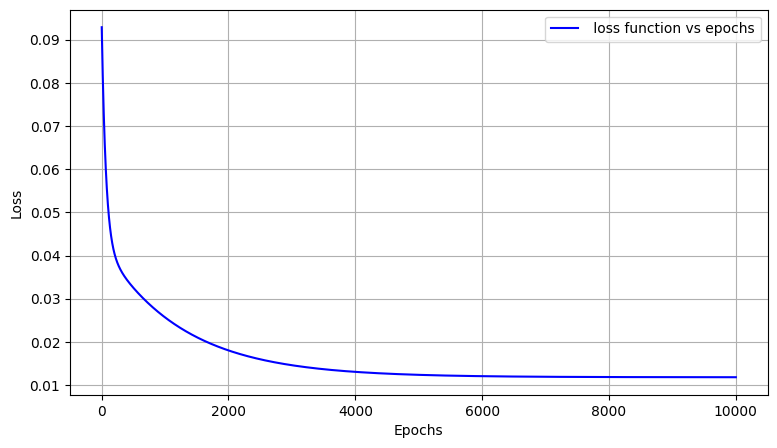

In [6]:
# plotting loss function
import matplotlib.pyplot as plt
x_axis=[]
for i in range(epochs):
    x_axis.append(i+1)
plt.figure(figsize=(9,5))
plt.plot(x_axis,losses,color='blue',label=" loss function vs epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.show()    

    

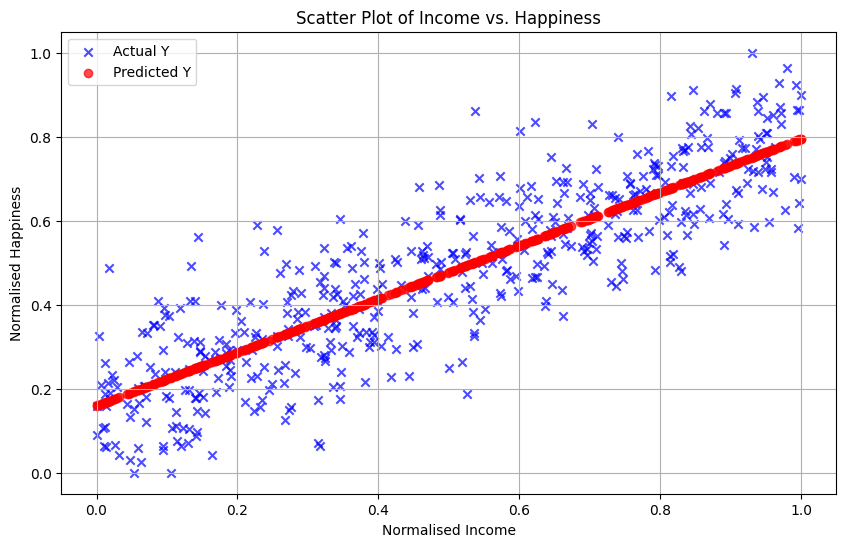

In [7]:
# plot graph between income and happiness

predicted_values=[]
for i in range(len(income)):
    y_predicted=y_predicted_array(W_0 ,W_i ,X_normalized)
    predicted_values.append(y_predicted )

predicted_values=np.array(predicted_values)

plt.figure(figsize=(10, 6))

# Scatter plot for actual values
plt.scatter(X_normalized,Y_normalized, color='blue', alpha=0.7, marker='x', label='Actual Y')

# Scatter plot for predicted values
plt.scatter(X_normalized, predicted_values[0], color='red', alpha=0.7, marker='o', label='Predicted Y')

# Plot title and labels
plt.title('Scatter Plot of Income vs. Happiness')
plt.xlabel('Normalised Income')
plt.ylabel('Normalised Happiness')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

FUNCTION FOR PREDICTING ON A UNIQUE DATA POINT

In [8]:
# making predictions
income_1 = 7.44811655720696

def find_happiness(income1,W_i ,W_0):
    # max-min of input feaute
    max_income = max(income)
    min_income=min(income)

    # max-min of target feaute
    max_happiness = max(Y_input)
    min_happiness=min(Y_input)


    scaled_income = (income1 - min_income)/(max_income-min_income)

    happiness_scaled= scaled_income*W_i[0] +W_0
    happiness = happiness_scaled * (max_happiness - min_happiness) + min_happiness

    return happiness

find_happiness(income_1,W_i,W_0)   

5.487601764966744

POLYNOMIAL REGRESSION 

In [9]:
# M=2 max power of the polynomial regression
X_input=np.array([income ,income**2,income**3])
print(X_input.shape)
W_i=np.array([0.4,0.23,0.675])
w_0=0.7


X_normalized,Y_normalized=min_max_normalize(X_input,Y_input)


print("number of samples---> ",X_input.shape[1])
print("number of features---> ",X_input.shape[0])
print("parametre size---> ",W_i.shape[0]+1)

print("input size --->",X_normalized.shape)
print("output size",Y_normalized.shape)
print()
print()


(3, 498)
number of samples--->  498
number of features--->  3
parametre size--->  4
input size ---> (3, 498)
output size (498,)




In [10]:
epochs=10000
learning_rate=0.003

diff_w_i = np.zeros(len(X_input))
diff_w_0=np.zeros(1)



TRAINING MODEL

In [11]:
print("Initial weights are",W_0,W_i)
W_0 ,W_i,losses=gradient_descent(W_0 ,W_i ,X_normalized ,Y_normalized ,epochs ,learning_rate)
print()
print(len(losses))
print("After gradient descent , the weights updated are",W_0,W_i)

Initial weights are 0.15940083896634025 [0.4   0.23  0.675]
epocs 1 -------------- New-Loss 0.07950052115933172
epocs 2 -------------- New-Loss 0.07858080275691583
epocs 3 -------------- New-Loss 0.07767774985754529
epocs 4 -------------- New-Loss 0.07679105027165355
epocs 5 -------------- New-Loss 0.07592039767828765
epocs 6 -------------- New-Loss 0.07506549151474898
epocs 7 -------------- New-Loss 0.07422603686830934
epocs 8 -------------- New-Loss 0.07340174436996308
epocs 9 -------------- New-Loss 0.07259233009017796
epocs 10 -------------- New-Loss 0.07179751543660552
epocs 11 -------------- New-Loss 0.07101702705371611
epocs 12 -------------- New-Loss 0.07025059672432048
epocs 13 -------------- New-Loss 0.069497961272944
epocs 14 -------------- New-Loss 0.06875886247101753
epocs 15 -------------- New-Loss 0.06803304694385161
epocs 16 -------------- New-Loss 0.06732026607935954
epocs 17 -------------- New-Loss 0.06662027593849768
epocs 18 -------------- New-Loss 0.065932837167389

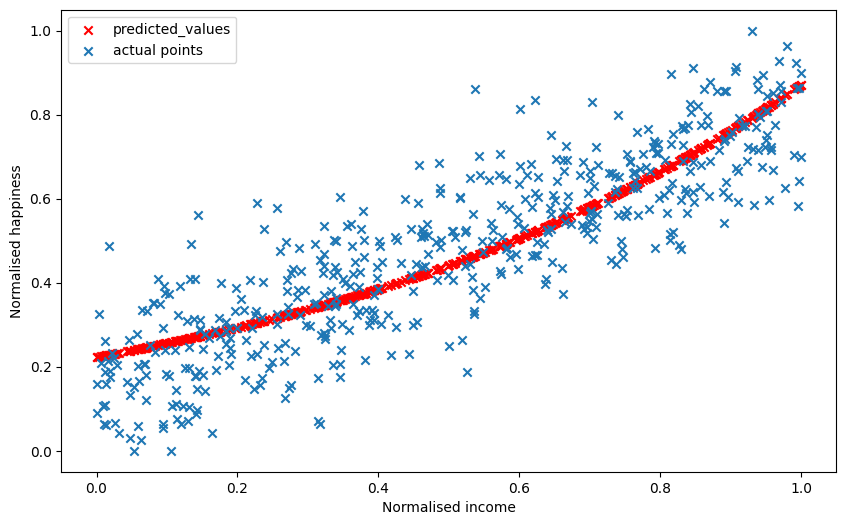

In [12]:
predicted_values=[]
for i in range(len(income)):
    y_predicted=y_predicted_array(W_0 ,W_i ,X_normalized)
    predicted_values.append(y_predicted )

predicted_values=np.array(predicted_values)

plt.figure(figsize=(10, 6))
plt.scatter(X_normalized[0],predicted_values[0] ,label="predicted_values",marker='x',color='red')
plt.scatter(X_normalized[0],Y_normalized ,label="actual points" ,marker='x')
plt.legend()
plt.xlabel("Normalised income")
plt.ylabel("Normalised happiness")
plt.show()
# print(predicted_values[0])